In [1]:
from pynq import Overlay

In [2]:
overlay = Overlay("/home/xilinx/pynq/bitstream/axi_pdm_fifo.bit")

In [4]:
import pynq.lib.dma
import matplotlib.pyplot as plt
import numpy as np
import wave

In [5]:
dma_send = overlay.axi_dma_0
dma_recv = overlay.axi_dma_0

In [6]:
from pynq import allocate
import numpy as np

data_size = 256
input_buffer = allocate(shape=(data_size,), dtype=np.uint32)


In [7]:
#for i in range(data_size):
#    input_buffer[i] = i + 0xcafeABCD

In [8]:
#for i in range(10):
#    print(hex(input_buffer[i]))

In [9]:
#for i in range(10):
#    print(hex(input_buffer[i]))

In [10]:
#dma_send.sendchannel.transfer(input_buffer)

In [11]:
output_buffer = allocate(shape=(data_size,), dtype=np.uint32)

for i in range(data_size):
    print('0x' + format(output_buffer[i], '02x'))



0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00
0x00


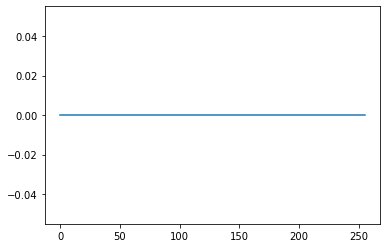

In [12]:
dma_recv.recvchannel.transfer(output_buffer)
#for i in range(data_size):
#    print('0x' + format(output_buffer[i], '02x'))
xpoints = [i for i in range(256)]
ypoints = output_buffer[:256]

plt.plot(xpoints,ypoints)


In [13]:
a = output_buffer[:256]
a.astype("float32")

# remove offset and normalise
a = a-np.mean(a)
a = a/np.amax(a)
sample_bytes = 4

a = a*(2**((sample_bytes*8)-1))-1
# convert back to int
sample_rate = (2.5e6)//64
a = a.astype('<i4')
# save to wav file
with wave.open("output.wav", "w") as fa:
# 2 Channels.
    fa.setnchannels(1)
    # 2 bytes per sample.
    fa.setsampwidth(sample_bytes)
    fa.setframerate(sample_rate)
    fa.writeframes(a)

/tmp/ipykernel_1832/66835004.py:6: RuntimeWarning: invalid value encountered in true_divide
  a = a/np.amax(a)


In [14]:
del input_buffer
del output_buffer